# Liver Disease Prediction - Classification

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("datasets/indian_liver_patient.csv")

In [3]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
df.shape

(583, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Proteins              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [6]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Proteins                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [7]:
df.dropna(inplace = True)

In [8]:
df.shape

(579, 11)

In [9]:
# Rename the dependent variable column
df = df.rename(columns = {"Dataset":"Liver_disease"})

In [10]:
# Renumber the value 2 to zero since a value of 1 indicates liver disease and 2 means the patient does not have it
df.Liver_disease.replace({2:0},inplace = True)

In [11]:
# Check means and standard deviations
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Liver_disease
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000
mean,44.782383,3.315371,1.494128,291.366149,81.126079,110.414508,6.481693,3.138515,0.947064,0.715026
std,16.221786,6.227716,2.816499,243.561863,183.182845,289.850034,1.084641,0.794435,0.319592,0.451792
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,61.000000,87.000000,7.200000,3.800000,1.100000,1.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000


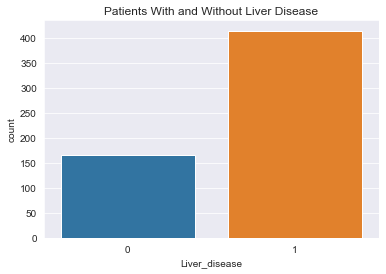

In [12]:
sns.countplot(data = df, x = "Liver_disease")
plt.title("Patients With and Without Liver Disease");

# Exploratory Data Analysis

## Boxplots of liver disease against each predictor

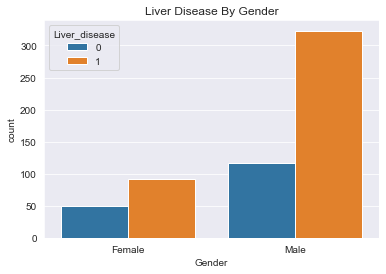

In [13]:
sns.countplot(data = df, x = "Gender", hue = "Liver_disease")
plt.title("Gender")
plt.title("Liver Disease By Gender");

In [14]:
df["Gender"].value_counts()

Male      439
Female    140
Name: Gender, dtype: int64

The countplots suggest more men have liver disease but there are more men in the dataset. 

In [15]:
pd.crosstab(df["Gender"], df["Liver_disease"])

Liver_disease,0,1
Gender,,
Female,49,91
Male,116,323


Looking at the relative amounts, 65% have disease, whereas for men, the percentage is 74% 

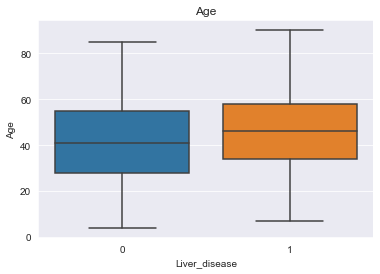

In [16]:
sns.boxplot(data = df, x = "Liver_disease", y = "Age")
plt.title("Age");

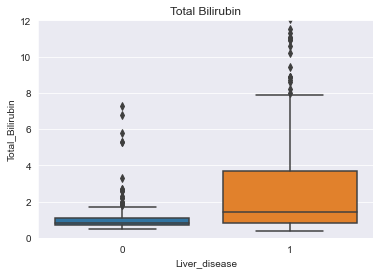

In [17]:
sns.boxplot(data = df, x = "Liver_disease", y = "Total_Bilirubin")
plt.title("Total Bilirubin")
plt.ylim(0,12);

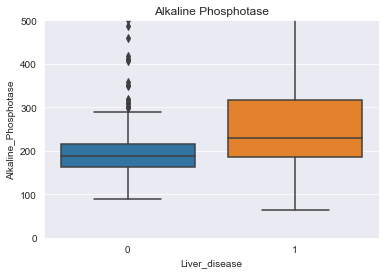

In [18]:
sns.boxplot(data = df, x = "Liver_disease", y = 'Alkaline_Phosphotase')
plt.title("Alkaline Phosphotase")
plt.ylim(0,500);

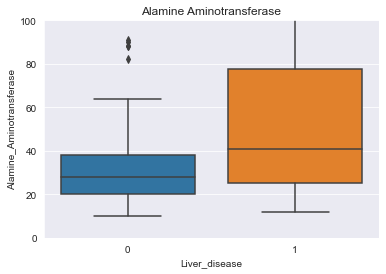

In [19]:
sns.boxplot(data = df, x = "Liver_disease", y = 'Alamine_Aminotransferase')
plt.title("Alamine Aminotransferase")
plt.ylim(0,100);

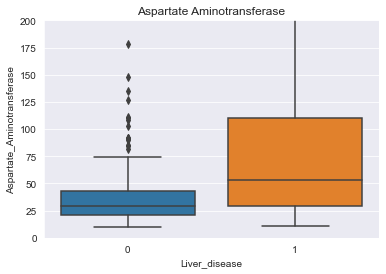

In [20]:
sns.boxplot(data = df, x = "Liver_disease", y = 'Aspartate_Aminotransferase')
plt.title("Aspartate Aminotransferase")
plt.ylim(0,200);

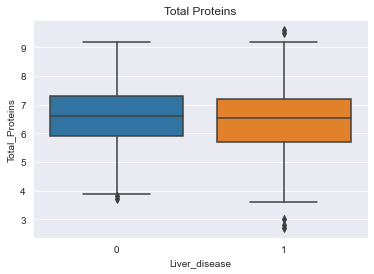

In [21]:
sns.boxplot(data = df, x = "Liver_disease", y = 'Total_Proteins')
plt.title("Total Proteins");

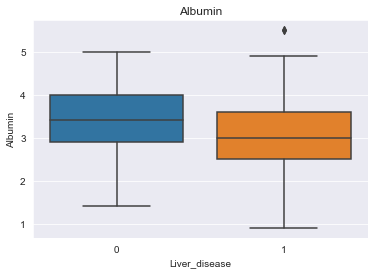

In [22]:
sns.boxplot(data = df, x = "Liver_disease", y = 'Albumin')
plt.title("Albumin");
#plt.ylim(0,200)

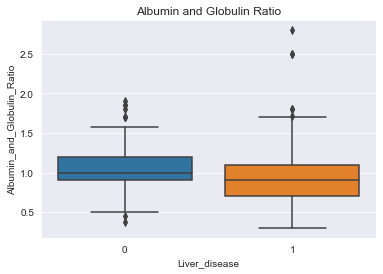

In [23]:
sns.boxplot(data = df, x = "Liver_disease", y = 'Albumin_and_Globulin_Ratio')
plt.title("Albumin and Globulin Ratio");
#plt.ylim(0,200)

There appear to be a few relationships with liver disease

<AxesSubplot:>

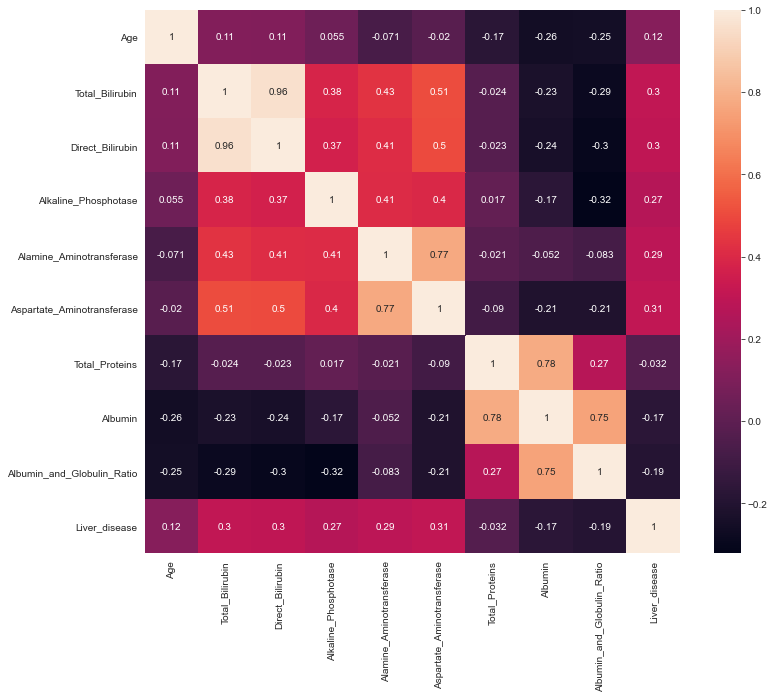

In [24]:
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(df.corr(method = "spearman"), annot = True)

There is some multicollinearity in the data amongst the proteins, the bilirubin and albumin and amino-transferase features.

In [25]:
# Change gender from strings to numbers
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
df["Gender"] = l.fit_transform(df["Gender"])

In [26]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Liver_disease
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


# Fit Models

In [27]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Proteins', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Liver_disease'],
      dtype='object')

In [38]:
# Need to deal with the multicollinear variables
X = df.drop(columns = ['Direct_Bilirubin','Alamine_Aminotransferase', 'Albumin',"Liver_disease"],axis = 1)
y = df["Liver_disease"]

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(463, 7) (116, 7) (463,) (116,)


In [42]:
# Separate numerical and categorical data
train_numerical = X_train.drop("Gender",axis = 1)
test_numerical = X_test.drop("Gender",axis = 1)

cat_train = X_train["Gender"]
cat_test = X_test["Gender"]

In [43]:
# Scale the numerical data
scaler = StandardScaler()

numerical_train = pd.DataFrame(scaler.fit_transform(train_numerical), columns = train_numerical.columns)
numerical_test = pd.DataFrame(scaler.transform(test_numerical), columns = test_numerical.columns)

In [44]:
# Reset index
cat_train.reset_index(drop = True, inplace = True)
cat_test.reset_index(drop = True, inplace = True)

In [45]:
# Concat the dataframe
X_train = pd.concat([numerical_train, cat_train], axis = 1)
X_test = pd.concat([numerical_test, cat_test], axis = 1)

In [46]:
svc = SVC()
sgd = SGDClassifier()
lr = LogisticRegression()
kn = KNeighborsClassifier()
rf = RandomForestClassifier()

In [52]:
def run_model(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)

              precision    recall  f1-score   support

           0       0.50      0.03      0.06        34
           1       0.71      0.99      0.83        82

    accuracy                           0.71       116
   macro avg       0.61      0.51      0.44       116
weighted avg       0.65      0.71      0.60       116



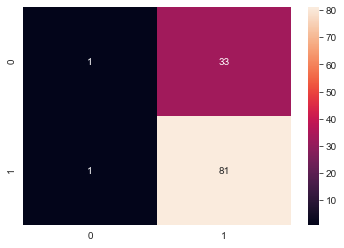

In [54]:
run_model(sgd)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        34
           1       0.71      1.00      0.83        82

    accuracy                           0.71       116
   macro avg       0.35      0.50      0.41       116
weighted avg       0.50      0.71      0.59       116



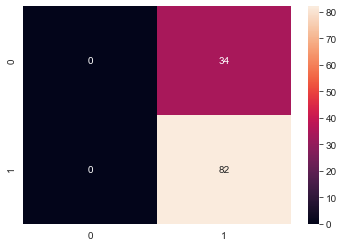

In [61]:
run_model(svc)

              precision    recall  f1-score   support

           0       0.47      0.26      0.34        34
           1       0.74      0.88      0.80        82

    accuracy                           0.70       116
   macro avg       0.61      0.57      0.57       116
weighted avg       0.66      0.70      0.67       116



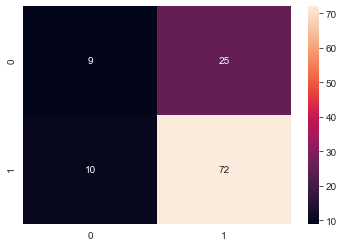

In [62]:
run_model(rf)

              precision    recall  f1-score   support

           0       0.39      0.21      0.27        34
           1       0.72      0.87      0.79        82

    accuracy                           0.67       116
   macro avg       0.56      0.54      0.53       116
weighted avg       0.63      0.67      0.64       116



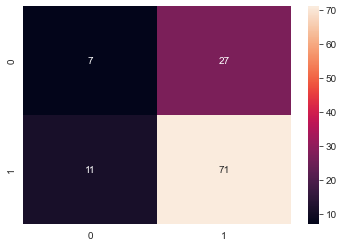

In [63]:
run_model(kn)

              precision    recall  f1-score   support

           0       0.78      0.21      0.33        34
           1       0.75      0.98      0.85        82

    accuracy                           0.75       116
   macro avg       0.76      0.59      0.59       116
weighted avg       0.76      0.75      0.69       116



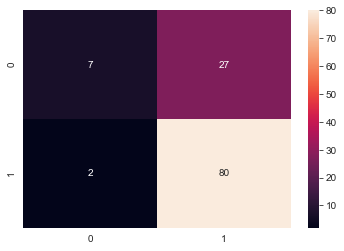

In [64]:
run_model(lr)